# DATA EXPLORATORY ANALYSIS FOR CREDIT CARD DATA

## BUSINESS PROBLEM:
In order to effectively produce quality decisions in the modern credit card industry, knowledge
must be gained through effective data analysis and modeling. Through the use of dynamic datadriven
decision-making tools and procedures, information can be gathered to successfully evaluate
all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries
across the globe.

Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud, and
collections, respond to customer requests for help with proactive offers and service.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
cust_acq = pd.read_csv("D:\Python\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")

repayment=pd.read_csv("D:\Python\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv")

spend=pd.read_csv("D:\Python\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv")


In [3]:
cust_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [4]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [5]:
repayment

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,3-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496,A67,9-May-05,55638.77
1496,1497,A68,10-May-06,319836.49
1497,1498,A69,11-Jul-06,247628.45
1498,1499,A70,12-Aug-05,454016.51


In [6]:
print(cust_acq.shape)
print(spend.shape)
print(repayment.shape)

(100, 8)
(1500, 5)
(1500, 4)


In [7]:
cust_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [8]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [9]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SL No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ KB


## 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values.

In [10]:
age_mean = cust_acq["Age"].mean()
print("The mean value of age is:",age_mean)
cust_acq.loc[cust_acq["Age"] < 18,"Age"] = cust_acq["Age"].mean()
print("Age is less than 18, replaced with mean of age values.")


The mean value of age is: 46.49
Age is less than 18, replaced with mean of age values.


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [11]:
cust_acq.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [12]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [62]:
cust_spend = pd.merge(left=cust_acq,right=spend,on="Customer",how="inner")
cust_spend.head(2)
print(cust_spend.shape)
cust_spend.info()

(1500, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Age       1500 non-null   float64       
 3   City      1500 non-null   object        
 4   Product   1500 non-null   object        
 5   Limit     1500 non-null   float64       
 6   Company   1500 non-null   object        
 7   Segment   1500 non-null   object        
 8   Sl No:    1500 non-null   int64         
 9   Month     1500 non-null   datetime64[ns]
 10  Type      1500 non-null   object        
 11  Amount    1500 non-null   float64       
 12  month     1500 non-null   object        
 13  year      1500 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 175.8+ KB


##### all the customers whose spend amount is more than the limit,replacing with 50% of that customer’s limit

In [14]:
print("All the customers whose spend amount is more than the limit")
cust_spend[cust_spend["Amount"] > cust_spend['Limit']]

All the customers whose spend amount is more than the limit


,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,3-Jan-04,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,28-Feb-05,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,6-Apr-04,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,23-Nov-04,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,30-Mar-06,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [15]:
cust_spend.loc[cust_spend["Amount"] > cust_spend["Limit"],"Amount"] = (50 * cust_spend["Limit"]).div(100)
print ("All the customers whose spend amount is more than the limit,replaced with 50% of that customer’s limit")

All the customers whose spend amount is more than the limit,replaced with 50% of that customer’s limit


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [16]:
cust_repay = pd.merge(left=repayment,right=cust_acq,on="Customer",how="inner")
cust_repay.head(2)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


##### All the customers where repayment amount is more than the limit.

In [17]:
cust_repay[cust_repay["Amount"] > cust_repay["Limit"]]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
18,8,A8,5-Feb-04,156913.59,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,110,A8,12-Jan-04,350999.98,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,124,A8,31-Mar-06,155642.95,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,138,A8,9-May-05,145457.38,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
22,152,A8,8-May-06,361184.89,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...,...,...
1494,259,A7,6-May-06,400375.97,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295,A7,3-Dec-05,429700.12,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313,A7,23-Feb-05,344628.72,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331,A7,31-Mar-06,336264.37,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [18]:
cust_repay.loc[cust_repay["Amount"] > cust_repay["Limit"],"Amount"] = cust_repay["Limit"]
print("customers where repayment amount is more than the limit, replaced the repayment with the limit.")

customers where repayment amount is more than the limit, replaced the repayment with the limit.


## 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [19]:
distinct_customers = cust_acq["Customer"].nunique()

print("Number of distinct customers are",distinct_customers)

Number of distinct customers are 100


### b. How many distinct categories exist?

In [20]:
dis_cat=cust_acq["Segment"].nunique()
cat_name=cust_acq["Segment"].unique()
print("Distinct categories exist :",dis_cat)
print("Ctegories are :",cat_name)

Distinct categories exist : 5
Ctegories are : ['Self Employed' 'Salaried_MNC' 'Salaried_Pvt' 'Govt' 'Normal Salary']


In [21]:
print("Distinct categories exist :",dis_cat)
series=pd.Series(cat_name)
print("Ctegories are :")
print (series)

Distinct categories exist : 5
Ctegories are :
0    Self Employed
1     Salaried_MNC
2     Salaried_Pvt
3             Govt
4    Normal Salary
dtype: object


### c. What is the average monthly spend by customers?

In [50]:
spend['Month'] = pd.to_datetime(spend['Month'])

In [23]:
spend['Month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: Month
Non-Null Count  Dtype         
--------------  -----         
1500 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.8 KB


In [24]:
spend['month'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['year'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))


In [25]:
customers_monthly_spend= round(spend.groupby(['year','month']).mean(),2).drop(columns='Sl No:')
customers_monthly_spend

Amount
year month               
2004 April      235272.04
     February   221215.27
     January    251712.07
     March      232146.12
     May        217539.24
     November   270486.40
     September  310923.38
2005 April      252181.33
     August     233734.63
     December   147503.06
     February   229802.28
     January    292741.37
     July       229116.66
     June       262688.11
     May        245696.52
     November   286143.32
     October    194568.64
     September  188666.20
2006 April      232468.97
     August     240699.72
     December   270470.98
     February   253858.26
     January    282058.01
     July       287505.10
     June       177252.39
     March      247166.08
     May        236162.74
     November   182841.29
     October    236136.34
     September  158520.09

### d. What is the average monthly repayment by customers?

In [26]:
repayment["Month"] = pd.to_datetime(repayment["Month"])

In [27]:
repayment['Monthly'] = repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repayment['Year'] =repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [28]:

repayment

,SL No:,Customer,Month,Amount,Monthly,Year
0,1,A1,2004-01-12,495414.75,January,2004
1,2,A1,2004-01-03,245899.02,January,2004
2,3,A1,2004-01-15,259490.06,January,2004
3,4,A1,2004-01-25,437555.12,January,2004
4,5,A1,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...
1495,1496,A67,2005-05-09,55638.77,May,2005
1496,1497,A68,2006-05-10,319836.49,May,2006
1497,1498,A69,2006-07-11,247628.45,July,2006
1498,1499,A70,2005-08-12,454016.51,August,2005


In [29]:
cust_monthly_repayment= round(repayment.groupby(['Year','Monthly']).mean(),2)


In [30]:
cust_monthly_repayment.drop(columns='SL No:',inplace=True)

In [31]:
cust_monthly_repayment

Amount
Year Monthly             
2004 April      259141.68
     February   256702.63
     January    243489.65
     March      252585.28
     May        226162.72
     November   209592.24
     September  184487.85
2005 April      212688.63
     August     264430.92
     December   320379.34
     February   238829.27
     January    240548.10
     July       239871.48
     June       210199.82
     May        263207.37
     November   256695.12
     October    219849.96
     September  247700.17
2006 April      275472.25
     August     224143.99
     December   252736.57
     February   284489.57
     January    293475.39
     July       257936.38
     June       251990.45
     March      240851.27
     May        256920.88
     November   199399.20
     October    260765.48
     September  262533.88

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [32]:
cust_spend_repay = pd.merge(left=cust_spend,right=repayment,on="Customer",how="inner")

In [33]:
cust_spend_repay.head(20)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Monthly,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,1,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5,2005-01-17,165972.88,January,2005
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,6,2005-02-23,365366.62,February,2005
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,7,2005-02-01,14473.41,February,2005
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,103,2004-01-12,350446.82,January,2004
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,117,2004-02-05,117964.43,February,2004
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,131,2006-04-19,79849.19,April,2006


In [34]:
cust_spend_repay.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month_x', 'Type', 'Amount_x', 'SL No:', 'Month_y',
       'Amount_y', 'Monthly', 'Year'],
      dtype='object')

In [35]:
cust_spend_repay.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)
cust_spend_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Spend_Amount,SL No:,Month_y,Repay_Amount,Monthly,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,1,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98,2004-01-25,310992.30,January,2004
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,99,2004-01-12,121874.90,January,2004
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,100,2004-01-03,337815.57,January,2004
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,101,2004-01-15,25682.73,January,2004


In [36]:
interest = round(cust_spend_repay.groupby(["Year","Monthly"])[['Spend_Amount','Repay_Amount']].sum(),2)
interest

Spend_Amount  Repay_Amount
Year Monthly                              
2004 April      1.194516e+08  2.285403e+08
     February   7.613922e+07  1.602419e+08
     January    1.088357e+09  1.699210e+09
     March      5.594171e+07  8.974470e+07
     May        8.800456e+07  1.411594e+08
     November   5.504612e+07  7.860290e+07
     September  5.144278e+07  8.016122e+07
2005 April      9.366405e+07  1.747894e+08
     August     1.361400e+08  2.477449e+08
     December   4.348638e+07  9.944533e+07
     February   5.890557e+08  9.416163e+08
     January    1.324129e+08  1.810333e+08
     July       3.995653e+07  7.997268e+07
     June       1.174019e+08  2.213774e+08
     May        7.149030e+08  1.099197e+09
     November   1.532278e+08  2.763119e+08
     October    3.140993e+07  6.027830e+07
     September  3.195551e+07  7.530449e+07
2006 April      3.229722e+08  6.093666e+08
     August     5.849630e+07  7.167032e+07
     December   4.585222e+07  7.087702e+07
     February   1.654843e+08  2.903280e+08
     January    5.127574e+07  8.974491e+07
     July       1.444093e+08  2.245720e+08
     June       5.302118e+07  6.914431e+07
     March      7.393854e+08  1.115725e+09
     May        3.297954e+08  5.434823e+08
     November   1.124836e+08  1.355832e+08
     October    5.285823e+07  7.890924e+07
     September  5.395681e+07  8.083199e+07

#### *Interest is earned only on positive profits and not on negative amounts
#### Monthly Profit = Monthly repayment– Monthly spend. 

In [37]:
interest['Monthly Profit'] = interest['Repay_Amount'] - interest['Spend_Amount']

In [38]:
interest

Spend_Amount  Repay_Amount  Monthly Profit
Year Monthly                                              
2004 April      1.194516e+08  2.285403e+08    1.090887e+08
     February   7.613922e+07  1.602419e+08    8.410268e+07
     January    1.088357e+09  1.699210e+09    6.108525e+08
     March      5.594171e+07  8.974470e+07    3.380298e+07
     May        8.800456e+07  1.411594e+08    5.315485e+07
     November   5.504612e+07  7.860290e+07    2.355678e+07
     September  5.144278e+07  8.016122e+07    2.871844e+07
2005 April      9.366405e+07  1.747894e+08    8.112539e+07
     August     1.361400e+08  2.477449e+08    1.116049e+08
     December   4.348638e+07  9.944533e+07    5.595895e+07
     February   5.890557e+08  9.416163e+08    3.525606e+08
     January    1.324129e+08  1.810333e+08    4.862042e+07
     July       3.995653e+07  7.997268e+07    4.001615e+07
     June       1.174019e+08  2.213774e+08    1.039755e+08
     May        7.149030e+08  1.099197e+09    3.842944e+08
     November   1.532278e+08  2.763119e+08    1.230841e+08
     October    3.140993e+07  6.027830e+07    2.886837e+07
     September  3.195551e+07  7.530449e+07    4.334898e+07
2006 April      3.229722e+08  6.093666e+08    2.863944e+08
     August     5.849630e+07  7.167032e+07    1.317402e+07
     December   4.585222e+07  7.087702e+07    2.502480e+07
     February   1.654843e+08  2.903280e+08    1.248436e+08
     January    5.127574e+07  8.974491e+07    3.846917e+07
     July       1.444093e+08  2.245720e+08    8.016271e+07
     June       5.302118e+07  6.914431e+07    1.612313e+07
     March      7.393854e+08  1.115725e+09    3.763400e+08
     May        3.297954e+08  5.434823e+08    2.136869e+08
     November   1.124836e+08  1.355832e+08    2.309955e+07
     October    5.285823e+07  7.890924e+07    2.605102e+07
     September  5.395681e+07  8.083199e+07    2.687518e+07

### f. What are the top 5 product types?

In [ ]:
print('Top 5 product types on which customer is spending')
Top_product=spend['Type'].value_counts().head()
Top_product.plot(kind='bar')
plt.show()

### g. Which city is having maximum spend?

In [ ]:
city_max_spend = cust_spend.groupby("City")[["Amount"]].sum().sort_values(by='Amount',ascending=False)
city_max_spend
city_max_spend.plot(kind='bar',title='city_max_spend',figsize=(10,7))
plt.show()

In [ ]:
city_max_spend

### h. Which age group is spending more money?

In [ ]:
cust_spend["Age Group"] =  pd.cut(cust_spend["Age"],bins=np.arange(18,91,10),labels=["18-28","28-38", "38-48" ,"48-58" ,"58-68","68-78","78-88"],
                                  include_lowest=True)

In [ ]:
cust_spend

In [ ]:
agegroup_spend = cust_spend.groupby("Age Group")[['Amount']].sum().sort_values(by='Amount',ascending=False)
agegroup_spend

In [ ]:
agegroup_spend.plot(kind="pie",title='Age group wise spending',figsize=(8,8),autopct="%1.0f%%",explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0],subplots=True)

In [ ]:
print('As Show in pie chart agegroup between 38-48 spending more money ')

### (i) Who are the top 10 customers in terms of repayment?

In [ ]:
cust_repay.groupby("Customer")[["Amount"]].sum().sort_values(by='Amount',ascending=False).head(10)

## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [ ]:
cust_spend.info()

In [123]:
cust_spend["Month"] = pd.to_datetime(cust_spend["Month"])
cust_spend['Year'] = cust_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [125]:
cust_spend.drop(columns="Year")

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,month,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,January,2004
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26,January,2004
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06,January,2004
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22,January,2004


In [58]:
cust_spend_prod = pd.pivot_table(data = cust_spend,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")

In [59]:
cust_spend_prod

Product                 Gold     Platimum      Silver
City       Year                                      
BANGALORE  2004   9289878.54   6046763.93  6773901.65
           2005  12892362.99   7784194.68  3936068.22
           2006  12030611.09   5620904.86  4967945.66
BOMBAY     2004   6987853.53   5199581.00  3061805.08
           2005   8983018.28   5134074.48  2368375.97
           2006   7917144.31   7547549.72  3628864.37
CALCUTTA   2004   7477140.98   5961165.93  3321963.10
           2005  10303355.80   8810284.03  1285609.11
           2006  11167532.77  11305526.03  4783182.26
CHENNAI    2004   1059618.50   5558572.68  1156129.37
           2005   3740945.58   8868435.43  1000540.48
           2006   2704288.62   6921130.79  1665326.62
COCHIN     2004   7315850.15   8472832.23  4587738.70
           2005  12110613.03  10856722.82  2619231.25
           2006  10499142.38  12453968.83  4579249.87
DELHI      2004   2806495.00   1565199.90  4293224.28
           2005   1964845.27   2068490.16  2515127.59
           2006   2957103.32    764247.73  4581831.29
PATNA      2004   2072567.90   1113069.60  3398795.65
           2005   3252615.77   2883231.07  5244763.90
           2006   2276181.69   1256137.65  3111911.31
TRIVANDRUM 2004   2415102.84   3761433.87   795897.19
           2005   1240375.85   7186762.35  1445540.63
           2006   2735710.87   4174473.45  2005942.36

<AxesSubplot:xlabel='City,Year', ylabel='_Amount'>

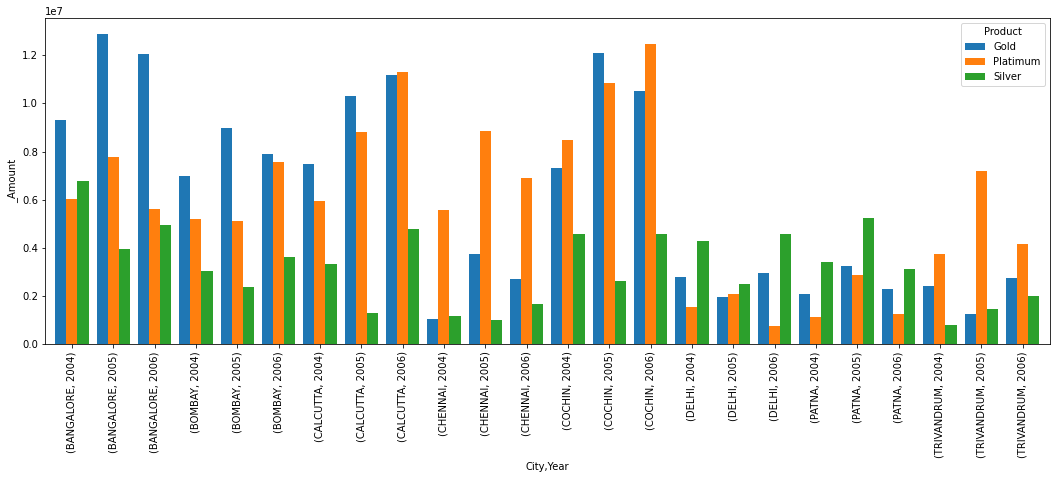

In [64]:
cust_spend_prod.plot(kind="bar",figsize=(18,6),width=0.8,ylabel='_Amount')

## 4. Create graphs for
###   a. Monthly comparison of total spends, city wise

In [65]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,month,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,January,2004
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26,January,2004
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06,January,2004
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22,January,2004


In [74]:
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,month,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,January,2004


In [70]:
month_city = cust_spend.groupby(["month","City"])[["Amount"]].sum().sort_index().reset_index()
month_city

,month,City,Amount
0,April,BANGALORE,6182081.72
1,April,BOMBAY,3726382.34
2,April,CALCUTTA,6883832.96
3,April,CHENNAI,3231144.38
4,April,COCHIN,7070107.83
...,...,...,...
91,September,CHENNAI,1591669.63
92,September,COCHIN,1739644.69
93,September,DELHI,245802.04
94,September,PATNA,70329.95


In [78]:
month_city =pd.pivot_table(data=cust_spend,values='Amount',index='City',columns='month',aggfunc='sum')
month_city

month,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,6182081.72,1552898.45,722473.97,9875860.87,17782487.66,3737413.09,1382739.41,10765773.46,10743668.90,3435745.65,1855076.43,1306412.01
BOMBAY,3726382.34,1066744.75,604939.17,7813534.61,10681854.60,612457.59,1486412.18,9857699.82,6974931.87,5120665.55,1047561.39,1835082.87
CALCUTTA,6883832.96,2179294.85,456826.68,11449586.70,14163384.38,2323261.43,2693423.54,10076115.86,7868030.30,3490771.91,622463.42,2208767.98
CHENNAI,3231144.38,681577.16,223628.27,5866408.35,7649568.68,1186667.37,1903803.90,4413870.52,4422623.36,1347779.28,156247.17,1591669.63
COCHIN,7070107.83,2582997.08,2011774.32,9459367.08,18692606.60,1758023.02,2738031.53,10733411.24,9912248.75,5128350.59,1668786.53,1739644.69
DELHI,2845176.75,475893.81,967169.49,3072043.85,7373794.37,488399.04,828262.78,3386628.30,2638193.66,1130584.99,64615.46,245802.04
PATNA,2786278.83,813559.15,223902.41,3466726.76,7388720.78,191003.23,1653183.92,3795753.30,3476601.00,413677.87,329537.34,70329.95
TRIVANDRUM,2775772.32,561400.55,640922.26,4459329.30,5688758.54,960551.29,828576.89,3855833.54,4631877.09,856809.41,285581.92,215826.30


<AxesSubplot:xlabel='City'>

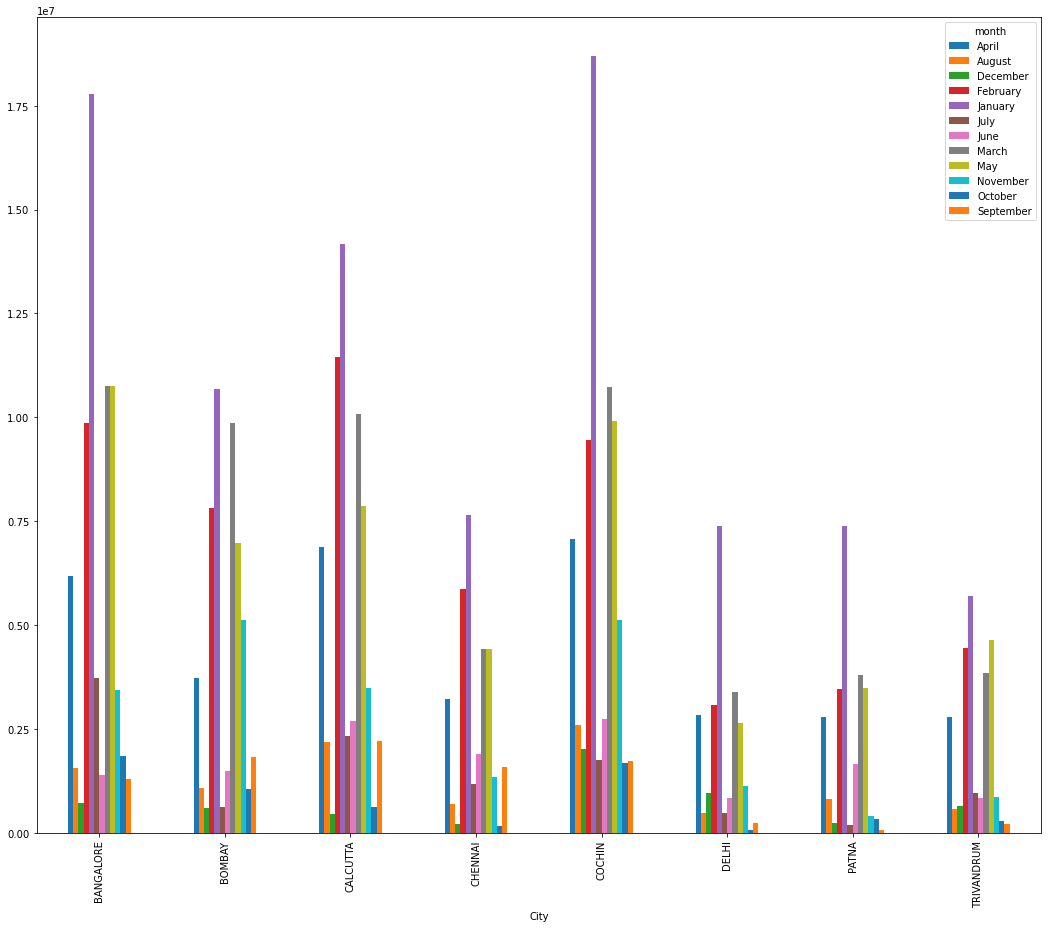

In [83]:
month_city.plot(kind='bar',figsize=(18,15))

### b. Comparison of yearly spend on air tickets

In [89]:
air_tickets = cust_spend.loc[cust_spend["Type"]=="AIR TICKET"]
air_tickets

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,month,year
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,2006-04-19,AIR TICKET,346925.68,April,2006
63,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,275,2006-03-03,AIR TICKET,10763.44,March,2006
80,6,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,276,2006-04-03,AIR TICKET,357943.87,April,2006
97,7,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,277,2006-05-03,AIR TICKET,305050.62,May,2006
115,8,A8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt,278,2006-06-03,AIR TICKET,173354.23,June,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,75,A75,36.0,BOMBAY,Silver,100003.0,C37,Self Employed,77,2005-02-23,AIR TICKET,217827.88,February,2005
1475,76,A76,66.0,BANGALORE,Silver,500000.0,C38,Self Employed,78,2005-02-03,AIR TICKET,30066.44,February,2005
1476,77,A77,35.0,BANGALORE,Silver,500000.0,C39,Self Employed,79,2006-02-04,AIR TICKET,31048.93,February,2006
1483,84,A84,70.0,PATNA,Silver,100000.0,C7,Govt,86,2006-03-27,AIR TICKET,124861.57,March,2006


In [90]:
air_tickets = air_tickets.groupby(["year"])[["Amount"]].sum()#.reset_index()
air_tickets

,Amount
year,
2004,8370914.59
2005,14495718.73
2006,10088812.10


<AxesSubplot:title={'center':'Comparison of yearly spend on air tickets'}, xlabel='Year', ylabel='Amount'>

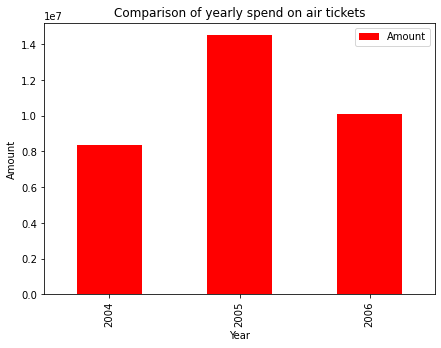

In [99]:
air_tickets.plot(kind='bar',figsize=(7,5),ylabel="Amount",xlabel='Year',title='Comparison of yearly spend on air tickets',color='red')

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [103]:
product_spend = pd.pivot_table(data=cust_spend,index='Product',columns='month',values='Amount',aggfunc='sum')
product_spend

month,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,12798498.34,3892605.15,2951972.85,22081411.74,35212526.96,3695098.37,4756418.62,22639437.70,19380600.97,7977852.48,2517051.91,3411278.13
Silver,9531706.20,1067730.23,566722.76,8602266.23,21794816.82,2395261.32,2219152.89,14988675.86,9739404.20,3743265.31,494594.37,1985369.72


<AxesSubplot:xlabel='Product'>

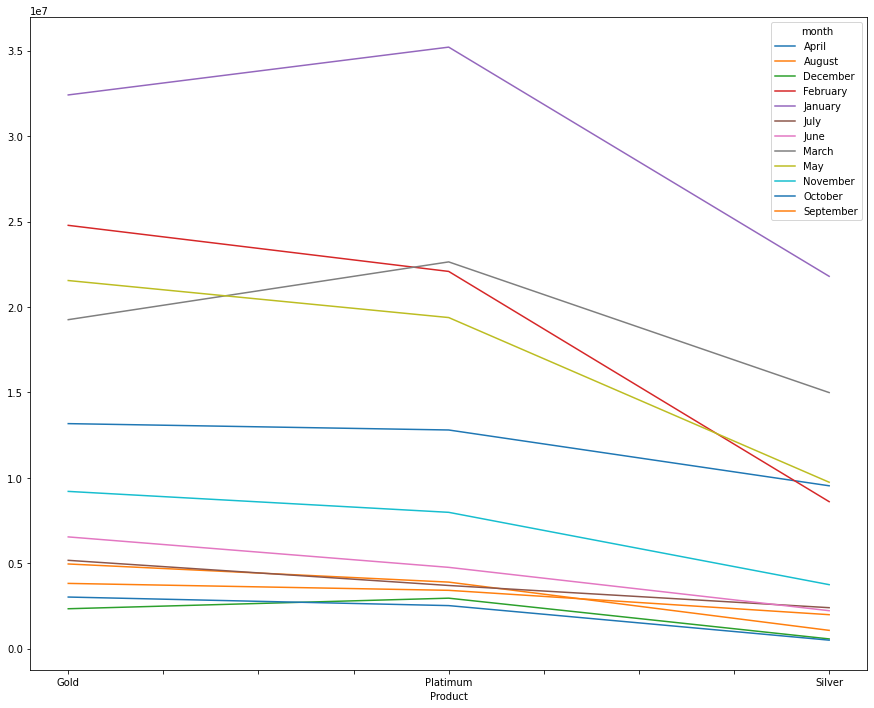

In [109]:
product_spend.plot(kind="line",figsize=(15,12),)

In [126]:
print("Out of these months,highest sales are in January ")

Out of these months,highest sales are in January 


## 5. Write user defined PYTHON function to perform the following analysis:

### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.


In [133]:
cust_repay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
 4   No        1500 non-null   int64         
 5   Age       1500 non-null   float64       
 6   City      1500 non-null   object        
 7   Product   1500 non-null   object        
 8   Limit     1500 non-null   float64       
 9   Company   1500 non-null   object        
 10  Segment   1500 non-null   object        
 11  Monthly   1500 non-null   object        
 12  Yearly    1500 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 196.4+ KB


In [132]:
cust_repay['Month'] = pd.to_datetime(cust_repay['Month'])
cust_repay['Monthly'] = cust_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_repay['Yearly'] = cust_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [147]:
def summary_report(product,timeperiod):
    print('Data for:','Product-',product.upper(),',','Timeperiod-',timeperiod.upper())
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result


if __name__ == "__main__" :
   
   product = input('Give the product name for which you want the data:')
timeperiod=input('Give the timeperiod for which you want the data(Yearly OR Monthly):') 
summary_report(product,timeperiod)

Give the product name for which you want the data:GOLD
Give the timeperiod for which you want the data(Yearly OR Monthly):YEARLY
Data for: Product- GOLD , Timeperiod- YEARLY


Yearly                             2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2359797.84  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A63        788855.60         NaN   211117.12
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A90              NaN         NaN   109931.32
                   A94        153465.89         NaN         NaN
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN